# Working with Dates and Times in Python

* Link: https://learn.datacamp.com/courses/working-with-dates-and-times-in-python

## Course Description

You'll probably never have a time machine, but how about a machine for analyzing time? As soon as time enters any analysis, things can get weird. It's easy to get tripped up on day and month boundaries, time zones, daylight saving time, and all sorts of other things that can confuse the unprepared. If you're going to do any kind of analysis involving time, you’ll want to use Python to sort it out. Working with data sets on hurricanes and bike trips, we’ll cover counting events, figuring out how much time has elapsed between events and plotting data over time. You'll work in both standard Python and in Pandas, and we'll touch on the dateutil library, the only timezone library endorsed by the official Python documentation. After this course, you'll confidently handle date and time data in any format like a champion.

In [6]:
import pandas as pd

datapath = '/content/drive/MyDrive/Colab Notebooks/Career Track - Data Scientist with Python/17 - Course - Working with Dates and Times in Python/datasets/'

# Chapter 1: Dates and Calendars

Hurricanes (also known as cyclones or typhoons) hit the U.S. state of Florida several times per year. To start off this course, you'll learn how to work with date objects in Python, starting with the dates of every hurricane to hit Florida since 1950. You'll learn how Python handles dates, common date operations, and the right way to format dates to avoid confusion.

## Dates in Python

Let's assume we have two hurricane dates. How can we do que following:
* Calculate how many days had elapsed.
* Check that they were in order from earliest to latest.
* Know which day of the week each was.
* Filter out hurricanes which happened between certain dates.


### Creating date objects

* `datetime` package
* `date()` function to create a date object
  * year / month / day

In [2]:
# Import date
from datetime import date

# Create dates
two_hurricanes_dates = [date(2016, 10, 7), date(2017, 6, 21)]

print(two_hurricanes_dates[0].year)
print(two_hurricanes_dates[0].month)
print(two_hurricanes_dates[0].day)

# 0:Monday, 1:Tuesday, 2:Wednesday, 3:Thurday, 4:Friday, 5:Saturday, 6:Sunday
print(two_hurricanes_dates[0].weekday())

2016
10
7
4


In [7]:
import pandas as pd

filename = 'florida_hurricane_dates.pkl'
florida_hurricane_dates = pd.read_pickle(datapath + filename)

# Counter for how many before June 1
early_hurricanes = 0

# Loop over the dates
for hurricane in florida_hurricane_dates:
  # Check if the month is before June (month number 6)
  if hurricane.month < 6:
    early_hurricanes = early_hurricanes + 1    
print(early_hurricanes)

10


## Math with Dates

 * Python's `datetime` can easily handle mathematical operations such as addition and subtraction with dates.
 * It treats months with 28, 30 and 31 days transparently.

In [8]:
# Import date
from datetime import date

# Create our dates
d1 = date(2017, 11, 5) # November 5th, 2017
d2 = date(2017, 12, 4) # December 4th, 2017
l = [d1, d2]

print(min(l))

2017-11-05


In [ ]:
# Subtract two dates
delta = d2 - d1

# Number of days between two dates
print(delta.days)

29


In [ ]:
# Import timedelta
from datetime import timedelta

# Create a 29 day timedelta
td = timedelta(days=29)
print(d1 + td)

2017-12-04


In [ ]:
# Ordering dates
import datetime

dates_scrambled = [datetime.date(1988, 8, 4), datetime.date(1990, 10, 12), datetime.date(2003, 4, 20), 
                   datetime.date(1971, 9, 1), datetime.date(1988, 8, 23), datetime.date(1994, 8, 15), 
                   datetime.date(2002, 8, 4), datetime.date(1988, 5, 30), datetime.date(2003, 9, 13), 
                   datetime.date(2009, 8, 21), datetime.date(1978, 6, 22), datetime.date(1969, 6, 9)]

# Print the first and last scrambled dates
print(dates_scrambled[0])
print(dates_scrambled[-1])

# Put the dates in order
dates_ordered = sorted(dates_scrambled)

# Print the first and last ordered dates
print(dates_ordered[0])
print(dates_ordered[-1])

1988-08-04
1969-06-09
1969-06-09
2009-08-21


## Turning dates into strings

* ISO 8601 format: YYYY-MM-DD (year-month-day)
  * Always the same length, with 10 digits
  * If dates are in string ISO 8601 format, sorting returns a correct answer
  * If dates are in another format with, for example, month first, than strings would not sort in chronological order.


In [ ]:
from datetime import date
d = date(2017, 11, 5)
print(d, type(d)) # Standard ISO 8601 format: YYYY-MM-DD
print(d.isoformat(), type(d.isoformat()))

2017-11-05 <class 'datetime.date'>
2017-11-05 <class 'str'>


### strftime method

* Used to turn dates into any string format wanted.
* Flexible format approach

In [ ]:
# All codes: https://strftime.org/

d = date(2020, 8, 16)
print(d.strftime("%Y"))
print(d.strftime("Month is %m"))
print(d.strftime("Month is %B"))
print(d.strftime("Day of month is %d"))
print(d.strftime("Day of the week is %a"))
print(d.strftime("Day of the week is %A"))

2020
Month is 08
Month is August
Day of month is 16
Day of the week is Sun
Day of the week is Sunday


# Chapter 2: Combining Dates and Times

Bike sharing programs have swept through cities around the world -- and luckily for us, every trip gets recorded! Working with all of the comings and goings of one bike in Washington, D.C., you'll practice working with dates and times together. You'll parse dates and times from text, analyze peak trip times, calculate ride durations, and more.

## Adding time to the mix

In [ ]:
# Import datetime
from datetime import datetime

# Year, Month, Day, Hour, Minute, Second
dt1 = datetime(2020, 8, 16, 11, 30, 12) # August 16th, 2020 at 11:30:12AM

# Year, Month, Day, Hour, Minute, Second, Microseconds
dt2 = datetime(2020, 8, 16, 11, 30, 12, 500000) # August 16th, 2020 at 11:30:12.5AM

# Specifying arguments 
dt3 = datetime(year=2020, month=8, day=16, 
               hour=11, minute=30, second=12, 
               microsecond=500000)

print(dt1)
print(dt2)
print(dt3)

2020-08-16 11:30:12
2020-08-16 11:30:12.500000
2020-08-16 11:30:12.500000


### Creating datetimes from existing ones

In [ ]:
# Import datetime
from datetime import datetime

dt = datetime(2020, 8, 16, 11, 30, 12)
dt_hr = dt.replace(minute=0, second=0, microsecond=0)
print(dt)
print(dt_hr)

2020-08-16 11:30:12
2020-08-16 11:00:00


### Exercise
* Working with a list of all bike trips for one Capital Bikeshare bike, W20529, from October 1, 2017 to December 31, 2017.

In [9]:
# Reading data
filename = 'onebike_datetimes.pkl'
onebike_datetimes = pd.read_pickle(datapath + filename)

print(len(onebike_datetimes))
onebike_datetimes[:5]

290


[{'end': datetime.datetime(2017, 10, 1, 15, 26, 26),
  'start': datetime.datetime(2017, 10, 1, 15, 23, 25)},
 {'end': datetime.datetime(2017, 10, 1, 17, 49, 59),
  'start': datetime.datetime(2017, 10, 1, 15, 42, 57)},
 {'end': datetime.datetime(2017, 10, 2, 6, 42, 53),
  'start': datetime.datetime(2017, 10, 2, 6, 37, 10)},
 {'end': datetime.datetime(2017, 10, 2, 9, 18, 3),
  'start': datetime.datetime(2017, 10, 2, 8, 56, 45)},
 {'end': datetime.datetime(2017, 10, 2, 18, 45, 5),
  'start': datetime.datetime(2017, 10, 2, 18, 23, 48)}]

In [ ]:
# Counting events before and after noon

# Create dictionary to hold results
trip_counts = {'AM': 0, 'PM': 0}
  
# Loop over all trips
for trip in onebike_datetimes:
  # Check to see if the trip starts before noon
  if trip['start'].hour < 12:
    # Increment the counter for before noon
    trip_counts['AM'] += 1
  else:
    # Increment the counter for after noon
    trip_counts['PM'] += 1
  
print(trip_counts)

{'AM': 94, 'PM': 196}


## Printing and parsing datetimes

In [ ]:
from datetime import datetime

# Create datetime
dt = datetime(year=2020, month=8, day=16, 
              hour=12, minute=2, second=10)
print(dt.strftime("%Y-%m-%d"))
print(dt.strftime("%Y-%m-%d %H:%M:%S"))
print(dt.strftime("%H:%M:%S on %d/%m/%Y"))

2020-08-16
2020-08-16 12:02:10
12:02:10 on 16/08/2020


### ISO 8601 Format

In [ ]:
# ISO 8601 format
print(dt.isoformat())

2020-08-16T12:02:10


### Parsing datetimes with `strptime`
* strptime : short for string parse time
  * Creates a `datetime` object from a string, by specifying its format
  * The string to convert to `datetime` and the format string must be a perfect match, otherwise Python will throw an error.
* `strptime` takes two arguments
  * First: A string to turn into a datetime
  * Second: The format string how to do it

In [ ]:
# Import datetime
from datetime import datetime

dt = datetime.strptime("12/30/2017 15:19:13",
                       "%m/%d/%Y %H:%M:%S")
print(type(dt))
print(dt)

<class 'datetime.datetime'>
2017-12-30 15:19:13


In [ ]:
# Throw errors because format string isn't complete
dt_error = datetime.strptime("12/30/2017 15:19:13", "%m/%d/%Y")

ValueError: ignored

### Parsing datetimes with Pandas

* Many computers store datetime information behind the scenes as the number of seconds since January 1, 1970.
  * This date is largely considered the birth of modern-style computers.

* `fromtimestamp()` makes Python read a timestamp and return a `datetime`.

In [ ]:
# Reading a timestamp

# A timestamp
ts = 1575747383.0 

# Convert to datetime and print
print(datetime.fromtimestamp(ts))

2019-12-07 19:36:23


### Exercise 1
* String to datetime

| **Format** | **Description**          |
|:----------:|:------------------------:|
|"%Y"        | 4 digit year (0000-9999) |
|"%m"        | 2 digit month (1-12)     |
|"%d"        | 2 digit day (1-31)       |
|"%H"        | 2 digit hour (0-23)      |
|"%M"        | 2 digit minute (0-59)    |
|"%S"        | 2 digit second (0-59)    |

In [ ]:
# Import the datetime class
from datetime import datetime

# Starting string
s1 = '2020-08-16 13:57:31' # YYYY-MM-DD HH:MM:SS format
s2 = '08/16/2020 13:59:00' # MM/DD/YYYY HH:MM:SS format

# Write a format string to parse s1 and s2
fmt1 = '%Y-%m-%d %H:%M:%S'
fmt2 = '%m/%d/%Y %H:%M:%S'

# Create datetime objects d1 and d2
d1 = datetime.strptime(s1, fmt1)
d2 = datetime.strptime(s2, fmt2)

print(d1)
print(d2)

2020-08-16 13:57:31
2020-08-16 13:59:00


### Exercise 2

* Parsing pairs of strings as datetimes
* We should look at the data of `onebike_datetimes` to determine the correct format

In [11]:
from datetime import datetime

filename = 'onebike_datetime_strings.pkl'
onebike_datetime_strings = pd.read_pickle(datapath + filename)

# Write down the format string
fmt = "%Y-%m-%d %H:%M:%S"

# Initialize a list for holding the pairs of datetime objects
onebike_datetimes = []

# Loop over all trips
for (start, end) in onebike_datetime_strings:
  trip = {'start': datetime.strptime(start, fmt),
          'end': datetime.strptime(end, fmt)}
  
  # Append the trip
  onebike_datetimes.append(trip)
  
onebike_datetimes[:5]


[{'end': datetime.datetime(2017, 10, 1, 15, 26, 26),
  'start': datetime.datetime(2017, 10, 1, 15, 23, 25)},
 {'end': datetime.datetime(2017, 10, 1, 17, 49, 59),
  'start': datetime.datetime(2017, 10, 1, 15, 42, 57)},
 {'end': datetime.datetime(2017, 10, 2, 6, 42, 53),
  'start': datetime.datetime(2017, 10, 2, 6, 37, 10)},
 {'end': datetime.datetime(2017, 10, 2, 9, 18, 3),
  'start': datetime.datetime(2017, 10, 2, 8, 56, 45)},
 {'end': datetime.datetime(2017, 10, 2, 18, 45, 5),
  'start': datetime.datetime(2017, 10, 2, 18, 23, 48)}]

## Working with durations

* We can create `timedelta` variables to calculated elapsed time.
* `timedelta` can be **positive** or **negative**.
* A `timedelta` can have weeks, days, hours, minutes, seconds, milliseconds and microseconds


In [ ]:
# Create example datetimes
start = datetime(2020, 8, 16, 7, 27, 10)
end = datetime(2020, 8, 16, 15, 8, 50)

# Subtract datetimes to create a timedelta
duration = end - start

# Subtract datetimes to create a timedelta
print(duration.total_seconds())

27700.0


### Creating timedeltas

In [ ]:
# Import timedelta
from datetime import timedelta
start = datetime(2020, 8, 16, 7, 27, 10)
print(start)

# Create a timedeltas
delta1 = timedelta(seconds=1)
delta2 = timedelta(days=1, seconds=1)

print(start + delta1) # One second later
print(start + delta2) # One day and one second later

2020-08-16 07:27:10
2020-08-16 07:27:11
2020-08-17 07:27:11


### Exercise 1 - Turning pairs of datetimes into durations

* **Motivation:** When working with timestamps, we often want to know how much time has elapsed between events. Datetime arithmetic can be used to solve this problem. 
* **Objective**: Calculate the number of seconds that the bike was out of the dock for each trip.
* **Dataset**: Bike trip dataset `onebike_datetimes.pkl`.

In [12]:
filename = 'onebike_datetimes.pkl'
onebike_datetime = pd.read_pickle(datapath + filename)

# Initialize a list for all the trip durations
onebike_durations = []

for trip in onebike_datetimes:
  # Create a timedelta object corresponding to the length of the trip
  trip_duration = trip['end'] - trip['start']
  
  # Get the total elapsed seconds in trip_duration
  trip_length_seconds = trip_duration.total_seconds()
  
  # Append the results to our list
  onebike_durations.append(trip_length_seconds)

onebike_durations[:10]

[181.0, 7622.0, 343.0, 1278.0, 1277.0, 1366.0, 815.0, 545.0, 491.0, 639.0]

In [ ]:
# What was the total duration of all trips?
total_elapsed_time = sum(onebike_durations)

# What was the total number of trips?
number_of_trips = len(onebike_durations)
  
# Divide the total duration by the number of trips
print(total_elapsed_time / number_of_trips)

1178.9310344827586


In [ ]:
# Calculate shortest and longest trips
shortest_trip = min(onebike_durations)
longest_trip = max(onebike_durations)

# Print out the results
print("The shortest trip was " + str(shortest_trip) + " seconds")
print("The longest trip was " + str(longest_trip) + " seconds")

The shortest trip was -3346.0 seconds
The longest trip was 76913.0 seconds


# Chapter 3: Time Zones and Daylight Saving

In this chapter, you'll learn to confidently tackle the time-related topic that causes people the most trouble: time zones and daylight saving. Continuing with our bike data, you'll learn how to compare clocks around the world, how to gracefully handle "spring forward" and "fall back," and how to get up-to-date timezone data from the dateutil library.

## UTC offsets

* **Motivation**: Sometimes you need to know exactly the time an event occured and where. Knowing the time an event occured in local time can be an important information to keep.
  * Until now `datetime` objects didn't work with time zones.
  * UTC is an international time pattern created for us to be able to compare time in different parts of the world (different time zones).

### Bike Sharing Dataset

* The bike sharing dataset was collected in the Washington D.C. area, which is USA Eastern Time Zone.
* Typically the USA Eastern Time Zone is UTC - 5 hours, also represented as UTC-5.
* Setting an UTC offset to a `datetime` object, it becames aware of its time zone.

In [ ]:
# Import relevant classes
from datetime import datetime, timedelta, timezone

# US Eastern Standard time zone: UTC-5
ET = timezone(timedelta(hours=-5))

# Timezone-aware datetime
dt = datetime(2017, 12, 30, 15, 9, 3, tzinfo=ET)

# The print includes the UTC offset
print(dt)

2017-12-30 15:09:03-05:00


In [ ]:
# India Standard time zone
india_timezone = timezone(timedelta(hours=5, minutes=30))
brazil_timezone = timezone(timedelta(hours=-3))

# Convert dt to other timezones
print("Same moment, different clocks:")
print(dt, "UTC-5 Eastern USA")
print(dt.astimezone(india_timezone), "UTC+5.5 India")
print(dt.astimezone(brazil_timezone), "UTC-3 Brazil")

Same moment, different clocks:
2017-12-30 15:09:03-05:00 UTC-5 Eastern USA
2017-12-31 01:39:03+05:30 UTC+5.5 India
2017-12-30 17:09:03-03:00 UTC-3 Brazil


### Changing timezone with `replace`

In [ ]:
# Original clock and timezone
print(dt)

# Original clock, timezone changed to UTC+0
print(dt.replace(tzinfo=timezone.utc))

# Clock and timezone changed to the same moment in UTC+0
print(dt.astimezone(timezone.utc))

2017-12-30 15:09:03-05:00
2017-12-30 15:09:03+00:00
2017-12-30 20:09:03+00:00


### Exercise

* Setting timezones
* Changing clock to the corresponding time in UTC+0

In [14]:
from datetime import datetime, timedelta, timezone

filename = 'onebike_datetimes.pkl'
onebike_datetime = pd.read_pickle(datapath + filename)

# Create a timezone object corresponding to UTC-4
edt = timezone(timedelta(hours=-4))

print(onebike_datetime[:5])

# Loop over trips, updating the start and end datetimes to be in UTC-4
for i, trip in enumerate(onebike_datetime):
  # Update trip['start'] and trip['end']
  trip['start'] = trip['start'].replace(tzinfo=edt)
  trip['end'] = trip['end'].replace(tzinfo=edt)
  onebike_datetime[i] = trip

print(onebike_datetime[:5])

[{'end': datetime.datetime(2017, 10, 1, 15, 26, 26), 'start': datetime.datetime(2017, 10, 1, 15, 23, 25)}, {'end': datetime.datetime(2017, 10, 1, 17, 49, 59), 'start': datetime.datetime(2017, 10, 1, 15, 42, 57)}, {'end': datetime.datetime(2017, 10, 2, 6, 42, 53), 'start': datetime.datetime(2017, 10, 2, 6, 37, 10)}, {'end': datetime.datetime(2017, 10, 2, 9, 18, 3), 'start': datetime.datetime(2017, 10, 2, 8, 56, 45)}, {'end': datetime.datetime(2017, 10, 2, 18, 45, 5), 'start': datetime.datetime(2017, 10, 2, 18, 23, 48)}]
[{'end': datetime.datetime(2017, 10, 1, 15, 26, 26, tzinfo=datetime.timezone(datetime.timedelta(-1, 72000))), 'start': datetime.datetime(2017, 10, 1, 15, 23, 25, tzinfo=datetime.timezone(datetime.timedelta(-1, 72000)))}, {'end': datetime.datetime(2017, 10, 1, 17, 49, 59, tzinfo=datetime.timezone(datetime.timedelta(-1, 72000))), 'start': datetime.datetime(2017, 10, 1, 15, 42, 57, tzinfo=datetime.timezone(datetime.timedelta(-1, 72000)))}, {'end': datetime.datetime(2017, 10

In [ ]:
# Loop over the trips
for trip in onebike_datetimes[:5]:
  # Pull out the start and set it to UTC
  dt = trip['start'].astimezone(timezone.utc)
  
  # Print the start time in UTC
  print('Original:', trip['start'], '| UTC:', dt.isoformat())

Original: 2017-10-01 15:23:25-04:00 | UTC: 2017-10-01T19:23:25+00:00
Original: 2017-10-01 15:42:57-04:00 | UTC: 2017-10-01T19:42:57+00:00
Original: 2017-10-02 06:37:10-04:00 | UTC: 2017-10-02T10:37:10+00:00
Original: 2017-10-02 08:56:45-04:00 | UTC: 2017-10-02T12:56:45+00:00
Original: 2017-10-02 18:23:48-04:00 | UTC: 2017-10-02T22:23:48+00:00


## Time zone database

* Using timezones in practice
* Different countries, and regions inside a country, have different UTC offsets.
  * In some places the clock changes twice a year.
  * How to know all these UTC offsets to align the data?
<br><br>
* `tz` database helps with this problem
  * IANA time zone data gets updated every 3-4 months, as different jurisdictions make changes to their laws about time or as more historical information about timezones are uncovered.
  * This database is used by computer programs across many programming languages.
  * Package `dateutil`
  * `tz` database format is **'Continent/City'**
  * Some examples:
    * 'America/New_York'
    * 'America/Mexico_City'
    * 'Europe/London'
    * 'Africa/Accra'

* Features
  * It is importante to notice that the object created from `tz` will adjust the UTC offset depending on the date and time.
  * `tz` includes rules for UTC offsets going all the way back to the late 1960s, and sometimes earlier.

In [ ]:
# Imports
from datetime import datetime
from dateutil import tz

# Eastern time
et = tz.gettz('America/New_York')

# Last ride : Keep UTC offset to UTC-5 (usual UTC offset)
last = datetime(2017, 12, 30, 15, 9, 3, tzinfo=et)
print(last)

# First ride : Automatically ajusted UTC offset based on the date and time
first = datetime(2017, 10, 1, 15, 23, 25, tzinfo=et) 
print(first) 

2017-12-30 15:09:03-05:00
2017-10-01 15:23:25-04:00


### Exercise 1
* Dataset: `onebike_datetimes.pkl`
* Putting the bike trips into the right time zone

In [16]:
from dateutil import tz
import pandas as pd

filename = 'onebike_datetimes.pkl'
onebike_datetimes = pd.read_pickle(datapath + filename)

# Create a timezone object for Eastern Time
et = tz.gettz('America/New_York')

print(onebike_datetimes[:5])

# Loop over trips, updating the datetimes to be in Eastern Time
for i, trip in enumerate(onebike_datetimes):
    # Update trip['start'] and trip['end']
    trip['start'] = trip['start'].replace(tzinfo=et)
    trip['end'] = trip['end'].replace(tzinfo=et)
    onebike_datetimes[i] = trip

print(onebike_datetimes[:5])

[{'end': datetime.datetime(2017, 10, 1, 15, 26, 26), 'start': datetime.datetime(2017, 10, 1, 15, 23, 25)}, {'end': datetime.datetime(2017, 10, 1, 17, 49, 59), 'start': datetime.datetime(2017, 10, 1, 15, 42, 57)}, {'end': datetime.datetime(2017, 10, 2, 6, 42, 53), 'start': datetime.datetime(2017, 10, 2, 6, 37, 10)}, {'end': datetime.datetime(2017, 10, 2, 9, 18, 3), 'start': datetime.datetime(2017, 10, 2, 8, 56, 45)}, {'end': datetime.datetime(2017, 10, 2, 18, 45, 5), 'start': datetime.datetime(2017, 10, 2, 18, 23, 48)}]
[{'end': datetime.datetime(2017, 10, 1, 15, 26, 26, tzinfo=tzfile('/usr/share/zoneinfo/America/New_York')), 'start': datetime.datetime(2017, 10, 1, 15, 23, 25, tzinfo=tzfile('/usr/share/zoneinfo/America/New_York'))}, {'end': datetime.datetime(2017, 10, 1, 17, 49, 59, tzinfo=tzfile('/usr/share/zoneinfo/America/New_York')), 'start': datetime.datetime(2017, 10, 1, 15, 42, 57, tzinfo=tzfile('/usr/share/zoneinfo/America/New_York'))}, {'end': datetime.datetime(2017, 10, 2, 6, 

### Exercise 2
* Dataset: `onebike_datetimes.pkl`
* What time did the bike leave? (Global edition)
  * From 'America/New_York' into a few different time zones.
* When you need to move a `datetime` from one timezone into another, use `.astimezone()` and `tz`. 
* Often you will be moving things into UTC.

In [ ]:
# Create the timezone object
uk = tz.gettz('Europe/London') # UK
ist = tz.gettz('Asia/Kolkata') # India
sm = tz.gettz('Pacific/Apia') # Samoa

# Pull out the start of the first trip
local = onebike_datetimes[0]['start']

# Print them out and see the difference
print(local.isoformat())
print(local.astimezone(uk).isoformat()) # UTC+01:00
print(local.astimezone(ist).isoformat()) # UTC+05:30
print(local.astimezone(sm).isoformat()) # UTC+14:00

2017-10-01T15:23:25-04:00
2017-10-01T20:23:25+01:00
2017-10-02T00:53:25+05:30
2017-10-02T09:23:25+14:00


## Starting Daylight Saving Time

* Daylight Saving Time, also known in Brazil as "Horário de Verão" or in other countries as "Summer Time".
* The best terminology should be "Daylight Shifting", because it is what actually happens with the clock.
* Dealing with daylight saving time can be one of the most fiendish challenges in dealing with dates and times.
* When the shift in time happens, the UTC offset must change in the same amount

## Example
* Eastern US time moving forward one hour in time
* On 2017-03-12 at 01:00:00 it was UTC+0 2017-03-12 06:00:00, 5 hour difference
* On 2017-03-12 at 01:59:59 it was UTC+0 2017-03-12 06:59:59, 5 hour difference
* On 2017-03-12 at 03:00:00 it was UTC+0 2017-03-12 07:00:00, 4 hour difference (The forward shift happens)

* Setting the `datetime` objects with UTC offset prevent shifting problems in time from happening

In [ ]:
# Creating datetime objects : one hour and one second difference
from datetime import datetime

spring_ahead_159am = datetime(2017, 3, 12, 1, 59, 59)
print(spring_ahead_159am.isoformat())

spring_ahead_3am = datetime(2017, 3, 12, 3, 0, 0)
print(spring_ahead_3am.isoformat())

print((spring_ahead_3am - spring_ahead_159am).total_seconds())

2017-03-12T01:59:59
2017-03-12T03:00:00
3601.0


In [ ]:
# Setting datetime objects with UTC offset : one second different only 
from datetime import timezone, timedelta

EST = timezone(timedelta(hours=-5)) # Eastern Standard Time
EDT = timezone(timedelta(hours=-4)) # Eastern Daylight Time

spring_ahead_159am = spring_ahead_159am.replace(tzinfo = EST)
spring_ahead_3am = spring_ahead_3am.replace(tzinfo = EDT)

print(spring_ahead_159am.isoformat())
print(spring_ahead_3am.isoformat())
print((spring_ahead_3am - spring_ahead_159am).seconds)

2017-03-12T01:59:59-05:00
2017-03-12T03:00:00-04:00
1


### Working with dates and times without prior knowledge on daylight saving time
* We can use dataset `tz` 
* It has dates and times ajusted for Daylight Saving Time, so we don't have to know when the shift in time happens.
  * Furthermore , we don't need to know when the shift goes back to the standard time.

In [ ]:
from dateutil import tz

# Create eastern timezone
eastern = tz.gettz('America/New_York')

# 2017-03-12 01:59:59 in Eastern Time (EST)
time_159am = datetime(2017, 3, 12, 1, 59, 59,
                              tzinfo = eastern)

# 2017-03-12 03:00:00 in Eastern Time (EDT)
time_3am = datetime(2017, 3, 12, 3, 0, 0,
                            tzinfo = eastern)

# How many hours Python think have elapsed?
print(time_159am.isoformat())
print(time_3am.isoformat())
print((time_3am - time_159am).seconds)

# What if we move to UTC?
print(time_159am.astimezone(timezone.utc))
print(time_3am.astimezone(timezone.utc))
print((time_3am.astimezone(timezone.utc) - time_159am.astimezone(timezone.utc))\
      .total_seconds())

2017-03-12T01:59:59-05:00
2017-03-12T03:00:00-04:00
3601
2017-03-12 06:59:59+00:00
2017-03-12 07:00:00+00:00
1.0


### Exercise 1
* How many hours elapsed around daylight saving?


In [ ]:
# Import datetime, timedelta, tz, timezone
from datetime import datetime, timedelta, timezone
from dateutil import tz

# Start on March 12, 2017, midnight, then add 6 hours
start = datetime(2017, 3, 12, tzinfo = tz.gettz('America/New_York'))
end = start + timedelta(hours=6)

print(start.isoformat() + " to " + end.isoformat())

# How many hours Python think have elapsed?
print((end - start).total_seconds()/(60*60))

# What if we move to UTC?
print((end.astimezone(timezone.utc) - start.astimezone(timezone.utc))\
      .total_seconds()/(60*60))

2017-03-12T00:00:00-05:00 to 2017-03-12T06:00:00-04:00
6.0
5.0


### Exercise 2

* Daylight Saving rules are complicated: they're different in different places, they change over time, and they usually start on a Sunday (and so they move around the calendar).
* For example, in the United Kingdom, Daylight Saving begins on the last Sunday in March. 
* Let's look at the UTC offset for March 29, at midnight, for the years 2000 to 2010.

In [ ]:
# Import datetime and tz
from datetime import datetime
from dateutil import tz

# Create starting date
dt = datetime(2000, 3, 29, tzinfo = tz.gettz('Europe/London'))

# Loop over the dates, replacing the year, and print the ISO timestamp
for y in range(2000, 2011):
  print(dt.replace(year=y).isoformat())

"""
As you can see, the rules for Daylight Saving are not trivial. When in 
doubt, always use tz instead of hand-rolling timezones, so it will catch 
the Daylight Saving rules (and rule changes!) for you.
"""

2000-03-29T00:00:00+01:00
2001-03-29T00:00:00+01:00
2002-03-29T00:00:00+00:00
2003-03-29T00:00:00+00:00
2004-03-29T00:00:00+01:00
2005-03-29T00:00:00+01:00
2006-03-29T00:00:00+01:00
2007-03-29T00:00:00+01:00
2008-03-29T00:00:00+00:00
2009-03-29T00:00:00+00:00
2010-03-29T00:00:00+01:00


## Ending Daylight Saving Time

* In the summer clocks move forward.
* In the fall, when he clocks are reset back to standard time, an interesting wrinkle occurs.
* What happens when we "fall back" in time?

### Going back in time

* Example
  * Eastern US time moving back one hour in time
  * On 2017-11-05 at 01:00:00 (first) it was UTC+0 2017-11-05 05:00:00, 4 hour difference
  * On 2017-11-05 at 01:59:59 it was UTC+0 2017-11-05 05:59:59, 4 hour difference
  * Than time goes back one hour, and we have a second 01:00:00 On 2017-11-05 on Eastern US.
    * On 2017-11-05 at 01:00:00 (second) it was UTC+0 2017-11-05 06:00:00, 6 hour difference


* **To deal with this behaviour we HAVE to convert times to UTC, which are unambiguous**

In [ ]:
from datetime import datetime
from dateutil import tz

eastern = tz.gettz('US/Eastern')

# 2017-11-05 01:00:00
first_1am = datetime(2017, 11, 5, 1, 0, 0, tzinfo = eastern)

# Check if time is ambiguous
tz.datetime_ambiguous(first_1am)

True

In [ ]:
# 2017-11-05 01:00:00 again
second_1am = datetime(2017, 11, 5, 1, 0, 0, tzinfo = eastern)
second_1am_adjusted = tz.enfold(second_1am)

print(second_1am)
print(second_1am_adjusted)

2017-11-05 01:00:00-04:00
2017-11-05 01:00:00-05:00


In [ ]:
# Python don't differenciate the two times
(first_1am - second_1am_adjusted).total_seconds()

0.0

In [ ]:
# We need to convert times to UTC, which are unambiguous
first_1am = first_1am.astimezone(tz.UTC)
second_1am_adjusted = second_1am_adjusted.astimezone(tz.UTC)
print((first_1am - second_1am_adjusted).total_seconds())

"""
Correctly understands that the times have 1 hour interval between them
"""

-3600.0


'\nCorrectly understands that the times have 1 hour interval between them\n'

### Section summary
* Topics covered:
  * Handle springing forward and falling back, both with hand-coded UTC offsets and with `dateutil`.
  * To make sure timezones are correctly, use `dateutil` and then switch into UTC for the most accurate comparisons between events.

* Important note:
  * Python does not handle `tz.enfold()` when doing arithmetic, so we must put our `datetime` objects into UTC, where ambiguities have been resolved.
  * If you're collecting data, store it in UTC or with a fixed UTC offset!

### Exercise 1
* Finding ambiguous datetimes

In [17]:
from datetime import datetime
from dateutil import tz
import pandas as pd

filename = 'onebike_datetimes_timezones.pkl'
onebike_datetimes = pd.read_pickle(datapath + filename)

for trip in onebike_datetimes:
    # Rides with ambiguous start
    if tz.datetime_ambiguous(trip['start']):
        print("Ambiguous start at " + str(trip['start']))
    
    # Rides with ambiguous end 
    if tz.datetime_ambiguous(trip['end']):
        print("Ambiguous end at " + str(trip['end']))

Ambiguous start at 2017-11-05 01:56:50-04:00
Ambiguous end at 2017-11-05 01:01:04-04:00


### Exercise 2
* Cleaning daylight saving data with fold

In [18]:
from datetime import datetime
from dateutil import tz

filename = 'onebike_datetimes_timezones.pkl'
onebike_datetimes = pd.read_pickle(datapath + filename)

trip_durations = []
for trip in onebike_datetimes:
    # When the start is later than the end, set the fold to be 1
    if trip['start'] > trip['end']:
        trip['end'] = tz.enfold(trip['end'])
    # Convert to UTC
    start = trip['start'].astimezone(tz.UTC)
    end = trip['end'].astimezone(tz.UTC)

    # Subtract the difference
    trip_length_seconds = (end-start).total_seconds()
    trip_durations.append(trip_length_seconds)

# Take the shortest trip duration
print("Shortest trip: " + str(min(trip_durations)))

Shortest trip: 116.0


# Chapter 4: Easy and Powerful: Dates and Times in Pandas

To conclude this course, you'll apply everything you've learned about working with dates and times in standard Python to working with dates and times in Pandas. With additional information about each bike ride, such as what station it started and stopped at and whether or not the rider had a yearly membership, you'll be able to dig much more deeply into the bike trip data. In this chapter, you'll cover powerful Pandas operations, such as grouping and plotting results by time.

## Reading date and time data in Pandas

* Some topics you will learn:
  * Loading data in Pandas
  * Handling basic datetimes elements
  * Using slashes to continue lines
  * Select subsets of rows

In [19]:
# Import rides data. Columns 'Start date' and 'End date' imported as datetime objects
filename = 'capital-onebike.csv'
rides = pd.read_csv(datapath + filename, parse_dates=['Start date', 'End date'])

print(rides.head(3))

           Start date            End date  ...  Bike number Member type
0 2017-10-01 15:23:25 2017-10-01 15:26:26  ...       W20529      Member
1 2017-10-01 15:42:57 2017-10-01 17:49:59  ...       W20529      Casual
2 2017-10-02 06:37:10 2017-10-02 06:42:53  ...       W20529      Member

[3 rows x 8 columns]


In [ ]:
# Alternatively we can load the data and then convert each columns individually
rides['Start date'] = pd.to_datetime(rides['Start date'], format = "%Y-%m-%d %H:%M:%S")
rides['End date'] = pd.to_datetime(rides['End date'], format = "%Y-%m-%d %H:%M:%S")

# 'Start date' as a datetime object
rides['Start date'].iloc[2]

Timestamp('2017-10-02 06:37:10')

In [ ]:
# Create a duration column (timedelta)
rides['Duration'] = rides['End date'] - rides['Start date']
print(rides['Duration'].head(5))

0   00:03:01
1   02:07:02
2   00:05:43
3   00:21:18
4   00:21:17
Name: Duration, dtype: timedelta64[ns]


### Loading datetimes with `parse_dates`

In [ ]:
rides['Duration'] \
    .dt.total_seconds() \
    .head(5)

0     181.0
1    7622.0
2     343.0
3    1278.0
4    1277.0
Name: Duration, dtype: float64

## Summarizing datetime data in Pandas

* What you will learn:
  * How to summarize Pandas tables, especially for datetime columns
  * How to use basic Pandas operations, such as mean(), sum(), groupby(), resample()

In [20]:
filename = 'capital-onebike.csv'
rides = pd.read_csv(datapath + filename, parse_dates=['Start date', 'End date'])
rides['Duration'] = rides['End date'] - rides['Start date']

In [ ]:
# Average time out of the dock
print('Mean:', rides['Duration'].mean())

# Total time out of the dock
print('Sum:', rides['Duration'].sum())

Mean: 0 days 00:19:38.931034
Sum: 3 days 22:58:10


In [ ]:
from datetime import timedelta

# Number of days from October 1st to December 31th
days = 91

# Percent of time out of the dock
rides['Duration'].sum() / timedelta(days=days)

"""
Just about 4.3% of the time the bike was in use. 
This means that about 96% of the time the bike was in the dock.
"""

0.04348417785917786

In [ ]:
# Count how many time the bike started at each station
print(rides['Member type'].value_counts())

# Percent of rides by member
print(rides['Member type'].value_counts() / len(rides))

Member    236
Casual     54
Name: Member type, dtype: int64
Member    0.813793
Casual    0.186207
Name: Member type, dtype: float64


### Using groupby methods

* Using `groupy()`
* Using `resample()`

In [ ]:
# Standard groupby

# Add duration (in seconds) column
rides['Duration seconds'] = rides['Duration'].dt.total_seconds()
# Average duration per member type
rides.groupby('Member type')['Duration seconds'].mean()

Member type
Casual    1994.666667
Member     992.279661
Name: Duration seconds, dtype: float64

In [ ]:
# Another groupby approach, using resample() method

# Average duration by month
print(rides.resample('M', on='Start date')['Duration seconds'].mean())

"""
Groupby is done month by month ('M')
"""

Start date
2017-10-31    1886.453704
2017-11-30     854.174757
2017-12-31     635.101266
Freq: M, Name: Duration seconds, dtype: float64


"\nGroupby is done month by month ('M')\n"

In [ ]:
# Size per group
rides.groupby('Member type').size()

Member type
Casual     54
Member    236
dtype: int64

### Making simple plots

* Using `plot()` 
  * `plot()`uses `matplotlib` library

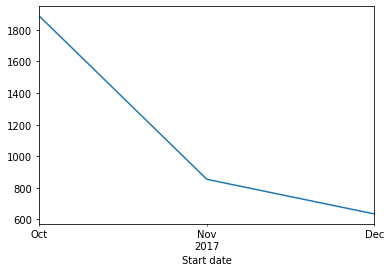

In [ ]:
rides\
    .resample('M', on='Start date')['Duration seconds']\
    .mean()\
    .plot()

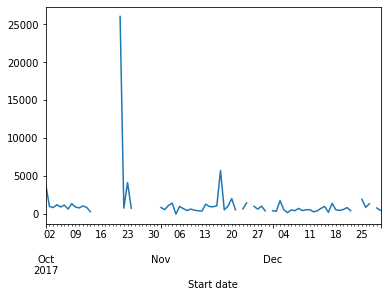

In [ ]:
rides\
    .resample('D', on='Start date')['Duration seconds']\
    .mean()\
    .plot()

### Exercise 1

* Calculating 'joyrides', that is, rides where the bike comes back to the same dock.

In [21]:
filename = 'capital-onebike.csv'
rides = pd.read_csv(datapath + filename, parse_dates=['Start date', 'End date'])
rides['Duration'] = rides['End date'] - rides['Start date']
rides['Duration'] = rides['Duration'].dt.total_seconds()

# Create joyrides
joyrides = (rides['Start station'] == rides['End station'])

# Total number of joyrides
print("{} rides were joyrides".format(joyrides.sum()))

# Median of all rides
print("The median duration overall was {:.2f} seconds"\
      .format(rides['Duration'].median()))

# Median of joyrides
print("The median duration for joyrides was {:.2f} seconds"\
      .format(rides[joyrides]['Duration'].median()))

6 rides were joyrides
The median duration overall was 660.00 seconds
The median duration for joyrides was 2642.50 seconds


### Exercise 2

* Washington, D.C. has mild weather overall, but the average high temperature in October (68ºF / 20ºC) is certainly higher than the average high temperature in December (47ºF / 8ºC). 
* People also travel more in December, and they work fewer days so they commute less.

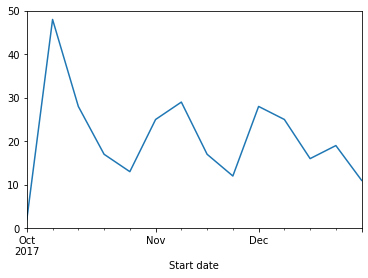

In [ ]:
# Import matplotlib
import matplotlib.pyplot as plt

# Resample rides to weekly, take the size, plot the results
rides.resample('W', on='Start date')\
  .size()\
  .plot(ylim = [0, 50])

# Show the results
plt.show()

### Exercise 3 - Members vs casual riders over time

* Riders can either be "Members", meaning they pay yearly for the ability to take a bike at any time, or "Casual", meaning they pay at the kiosk attached to the bike dock.
* Do members and casual riders drop off at the same rate over October to December, or does one drop off faster than the other?
  * It certainly looks like the fraction of Casual riders went down as the number of rides dropped.
  * With a little more digging, you could figure out if keeping Member rides only would be enough to stabilize the usage numbers throughout the fall.


In [ ]:
# Resample rides to be monthly on the basis of Start date
monthly_rides = rides.resample('M', on='Start date')['Member type']

# Take the ratio of the .value_counts() over the total number of rides
print(monthly_rides.value_counts() / monthly_rides.size())

Start date  Member type
2017-10-31  Member         0.768519
            Casual         0.231481
2017-11-30  Member         0.825243
            Casual         0.174757
2017-12-31  Member         0.860759
            Casual         0.139241
Name: Member type, dtype: float64


### Exercise 4 - Combining groupby() and resample()

* It looks like casual riders consistently took longer rides, but that both groups took shorter rides as the months went by. 
* Note that, by combining grouping and resampling, you can answer a lot of questions about nearly any data set that includes time as a feature. 
* Keep in mind that you can also group by more than one column at once.

In [ ]:
# Group rides by member type, and resample to the month
grouped = rides.groupby('Member type')\
  .resample('M', on='Start date')

# Print the median duration for each group
print(grouped['Duration'].median())

Member type  Start date
Casual       2017-10-31    1636.0
             2017-11-30    1159.5
             2017-12-31     850.0
Member       2017-10-31     671.0
             2017-11-30     655.0
             2017-12-31     387.5
Name: Duration, dtype: float64


## Additional datetime methods in Pandas



In [22]:
filename = 'capital-onebike.csv'
rides = pd.read_csv(datapath + filename, parse_dates=['Start date', 'End date'])
rides['Duration'] = rides['End date'] - rides['Start date']

# Negative time?? Something is wrong. Rides duration shouldn't ever be negative.
rides['Duration'].dt.total_seconds().min()

-3346.0

In [ ]:
# Checking datetimes to see if they have an UTC offset
rides['Start date'].head(3)

0   2017-10-01 15:23:25
1   2017-10-01 15:42:57
2   2017-10-02 06:37:10
Name: Start date, dtype: datetime64[ns]

### Using `dt.tz_localize`

* We can use `dt.tz_localize` to add UTC offsets to a datetime object.

In [ ]:
# Adding timezones to the first 3 datetimes
rides['Start date'].head(3).dt.tz_localize('America/New_York')

0   2017-10-01 15:23:25-04:00
1   2017-10-01 15:42:57-04:00
2   2017-10-02 06:37:10-04:00
Name: Start date, dtype: datetime64[ns, America/New_York]

### Ambiguous Time Error

* Trying to add an UTC offset for all data points in the DataFrame yields throw an AnbiguousTimeError if we have any ambiguous datetime in our database.
* We can set parameter `ambiguous` to `NaT`, so every ambiguous datetime will be set to `Not a Time`.
  * `min()` and other methods ignore `NaT` values.

In [ ]:
rides['Start date'].dt.tz_localize('America/New_York')

AmbiguousTimeError: ignored

In [ ]:
# Handle ambiguous datetimes
rides['Start date'] = rides['Start date'].dt.tz_localize('America/New_York', ambiguous='NaT')
rides['End date'] = rides['End date'].dt.tz_localize('America/New_York', ambiguous='NaT')

In [ ]:
# Re-calculate duration, ignoring bad row (NaT values)
rides['Duration'] = rides['End date'] - rides['Start date']
# Find the minimum again
rides['Duration'].dt.total_seconds().min()

116.00000000000001

In [ ]:
# Look at a problematic row
rides.iloc[129]

Start date                        NaT
End date                          NaT
Start station number            31615
Start station           6th & H St NE
End station number              31627
End station             3rd & M St NE
Bike number                    W20529
Member type                    Member
Duration                          NaT
Name: 129, dtype: object

### Other datetime operatins in Pandas

* `dt.year`
* `dt.month`
* `dt.day_name()`
* `shift()`

In [ ]:
# Year of first three rows
print(rides['Start date'].head(3).dt.year)
print(rides['Start date'].head(3).dt.month)

0    2017
1    2017
2    2017
Name: Start date, dtype: int64
0    10
1    10
2    10
Name: Start date, dtype: int64


In [ ]:
# See weekdays for first three rides
rides['Start date'].head(3).dt.day_name()

0    Sunday
1    Sunday
2    Monday
Name: Start date, dtype: object

In [ ]:
# Shift the indexes forward one, padding with NaT
rides['End date'].shift(1).head(3)

0                         NaT
1   2017-10-01 15:26:26-04:00
2   2017-10-01 17:49:59-04:00
Name: End date, dtype: datetime64[ns, America/New_York]

### Exercise 1 - Converting timezones

* Using `dt.tz_localize` and `dt.tz_convert`

In [23]:
filename = 'capital-onebike.csv'
rides = pd.read_csv(datapath + filename, parse_dates=['Start date', 'End date'])

# Localize the Start date column to America/New_York
rides['Start date'] = rides['Start date'].dt.tz_localize('America/New_York', ambiguous='NaT')
print(rides['Start date'].iloc[0])

# Convert the Start date column to Europe/London
rides['Start date'] = rides['Start date'].dt.tz_convert('Europe/London')
print(rides['Start date'].iloc[0])

2017-10-01 15:23:25-04:00
2017-10-01 20:23:25+01:00


### Exercise 2 - Median ride duration for each weekday

* Use of `dt.day_name()`

In [24]:
filename = 'capital-onebike.csv'
rides = pd.read_csv(datapath + filename, parse_dates=['Start date', 'End date'])
rides['Duration'] = rides['End date'] - rides['Start date']
rides['Duration'] = rides['Duration'].dt.total_seconds()

# Add a column for the weekday of the start of the ride
rides['Ride start weekday'] = rides['Start date'].dt.day_name()

# Print the median trip time per weekday
print(rides.groupby(by='Ride start weekday')['Duration'].median())

print(rides['Start date'])

Ride start weekday
Friday       724.5
Monday       810.5
Saturday     462.0
Sunday       902.5
Thursday     652.0
Tuesday      641.5
Wednesday    585.0
Name: Duration, dtype: float64
0     2017-10-01 15:23:25
1     2017-10-01 15:42:57
2     2017-10-02 06:37:10
3     2017-10-02 08:56:45
4     2017-10-02 18:23:48
              ...        
285   2017-12-29 14:32:55
286   2017-12-29 15:08:26
287   2017-12-29 20:33:34
288   2017-12-30 13:51:03
289   2017-12-30 15:09:03
Name: Start date, Length: 290, dtype: datetime64[ns]


### Exercise 3 - Duration between rides

* Calculate the time elapsed between every ride using the 'Start date' of a ride and the 'End date' of the last ride (row above)

In [25]:
filename = 'capital-onebike.csv'
rides = pd.read_csv(datapath + filename, parse_dates=['Start date', 'End date'])

# Shift the index of the end date up one; now subract it from the start date
rides['Time since'] = rides['Start date'] - (rides['End date'].shift(1))

# Move from a timedelta to a number of seconds, which is easier to work with
rides['Time since'] = rides['Time since'].dt.total_seconds()

# Resample to the month
monthly = rides.resample('M', on='Start date')

# Print the average hours between rides each month
print(monthly['Time since'].mean()/(60*60))

Start date
2017-10-31    5.519242
2017-11-30    7.256443
2017-12-31    9.202380
Freq: M, Name: Time since, dtype: float64


# Wrap-up

At this point, you have all of the knowledge you need to effectively use dates and times in Python. Even better, you've had a chance to practice!

Let's recap what you've learned.

### Recap: Dates and Calendars

* The `date()` class takes a year, month, and day as arguments
* A `date` object has accessors like `.year` , and also methods like `.weekday()`
* `date` objects can be compared like numbers, using `min()` , `max()` , and `sort()`
* You can subtract one `date` from another to get a `timedelta`
* To turn `date` objects into strings, use the `.isoformat()` or `.strftime()` methods

### Recap: Combining Dates and Times

* The `datetime()` class takes all the arguments of `date()` , plus an hour, minute, second, and microsecond
* All of the additional arguments are optional; otherwise, they're set to zero by default
* You can replace any value in a `datetime` with the `.replace()` method
* Convert a `timedelta` into an integer with its `.total_seconds()` method
* Turn strings into dates with `.strptime()` and dates into strings with `.strftime()`

### Recap: Timezones and Daylight Saving

* A `datetime` is "timezone aware" when it has its `tzinfo` set. Otherwise it is "timezone naive"
* Setting a timezone tells a `datetime` how to align itself to UTC, the universal time standard
* Use the `.replace()` method to change the timezone of a `datetime` , leaving the date and time the same
* Use the `.astimezone()` method to shift the date and time to match the new timezone
* `dateutil.tz` provides a comprehensive, updated timezone database

### Recap: Easy and Powerful Timestamps in Pandas

* When reading a csv, set the `parse_dates` argument to be the list of columns which should be
parsed as datetimes
* If setting `parse_dates` doesn't work, use the `pd.to_datetime()` function
* Grouping rows with `.groupby()` lets you calculate aggregates per group. For example, `.first()` , `.min()` or `.mean()`
*  `.resample()` groups rows on the basis of a datetime column, by year, month, day, and so on
* Use `.tz_localize()` to set a timezone, keeping the date and time the same
* Use `.tz_convert()` to change the date and time to match a new timezone